## 1D Be lens with $R=100\mu$m - comparison - orthogonal

created: **31/07/2022**; last edited: **31/08/2022**

[rafael.celestre@esrf.eu](mailto:rafael.celestre@esrf.eu)

<hr style="border:1px solid gray">

In [20]:
# imports

# checking we are using the correct python:
import sys
print(sys.executable)
print(sys.version)
sys.path.insert(0, '../../pylibs/')

%matplotlib notebook
import matplotlib.pylab as pl

from f_index_of_refraction import index_of_refraction

import barc4plots.barc4plots as b4pt         # get barc4plots: https://gitlab.esrf.fr/celestre/barc4plots
import barc4ro.projected_thickness as b4ro   # get barc4ro: https://github.com/oasys-kit/oasys-barc4ro
import barc4ro.barc4ro as b4RO

import numpy as np
from numpy.polynomial import Polynomial

/home/esrf/celestre/miniconda/envs/xog/bin/python
3.8.12 (default, Oct 12 2021, 13:49:34) 
[GCC 7.5.0]


In [26]:
# global variables

beamE = 17.035        # in keV
pix_size = 1.576  # in um
scan = [5, 10, 15]     # angles for the scan (degrees)
dpi = 250   # for plots

mat = 'Be'
delta, beta, att_len = index_of_refraction(mat, beamE*1e3)

print('>>> %s: n = 1 - %.6e + i %.6e (att. length %.6e) at %.3f keV'%(mat, delta, beta, att_len, beamE))

>>> Be: n = 1 - 1.173637e-06 + i 2.350257e-10 (att. length 2.464331e-02) at 17.035 keV


#### simulation data

In [27]:
vv = np.load('../simulations/results/1D_Be_R100um_ver_grad_orthogonal.npy')
y = np.load('../simulations/results/1D_Be_R100um_ver_grad_axis_orthogonal.npy')

#### experimental data

In [28]:
vv_exp = np.load('../experimental/results/1D_Be_R100um_ver_grad_exp_orthogonal.npy')
vv_exp_bis = np.load('../experimental/results/1D_Be_R100um_ver_grad_exp_bis_orthogonal.npy')

y_exp = np.load('../experimental/results/1D_Be_R100um_ver_grad_axis_exp_orthogonal.npy')

#### x-ray lens ideal parameters

In [29]:
# x-ray lens parameters in meters

mat = 'Be'

R = 92.8272e-6   # radius
L = 1e-3    # total thickness
wt = 35e-6  # wall thickness
Av = 2*np.sqrt((L-wt)*R)  # geometric aperture
Ah = 2.5e-3
focal_plane = 2          # plane of focusing: 1- horizontal, 2- vertical, 3- both
nCRL = 1

def cosine(x, a, b):
     return a * np.cos(x + b)

>>>> file 1D_Be_R100um_ver_grad_cuts_comp_orthogonal.png saved to disk.


<IPython.core.display.Javascript object>


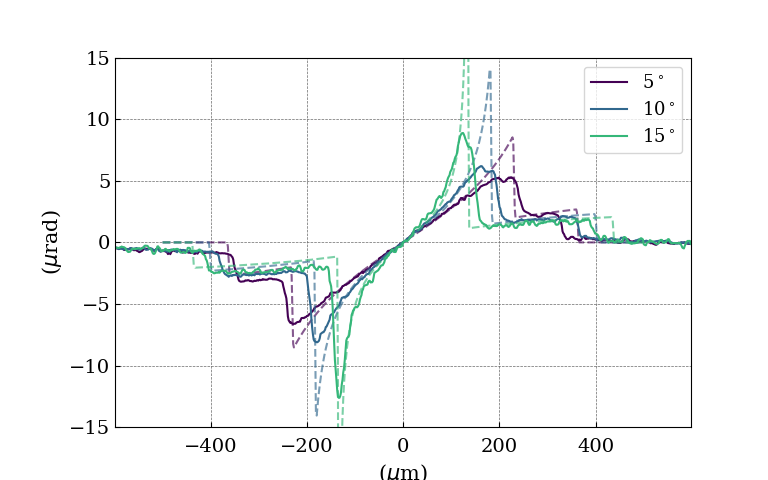

In [30]:
# vertical gradients

colors = pl.cm.viridis(np.linspace(0,1,len(scan)+1))
alpha = 0.65

for i in range(len(scan)):
    image = b4pt.Image2Plot(vv_exp[i, :]*1e6, y_exp[i, :]*1e6)
    image.LineStyle = '-'
    image.label = str(scan[i])+'$^\circ$'
    image.sort_class()
    image.alpha = 1
    image.LaTex = True
    image.LabelPos = 1
    image.ColorScheme = colors[i]
    if i == 0:
        b4pt.plot_1D(image, Enable=False, Hold=False)
        image = b4pt.Image2Plot(vv[i, :]*1e6, y*1e6)
        image.alpha = alpha
        image.ColorScheme = colors[i]
        image.LineStyle = '--'
        b4pt.plot_1D(image, Enable=False, Hold=True)        
    elif i == len(scan)-1:
        b4pt.plot_1D(image, Enable=False, Hold=True, dpi=dpi)
        image = b4pt.Image2Plot(vv[i, :]*1e6, y*1e6)
        image.alpha = alpha
        image.LineStyle = '--'
        image.AspectRatio = False
        image.LaTex = True
        image.legends = ['', '($\mu$m)', '($\mu$rad)']
        image.LabelPos = 1
        image.ax_limits = [-Av*1e6, Av*1e6, -15, 15]
        image.ColorScheme = colors[i]
        image.grid = True
        image.sort_class()
        b4pt.plot_1D(image, './results/1D_Be_R100um_ver_grad_cuts_comp_orthogonal.png', Enable=True, Hold=True)
    else:
        image.ColorScheme = colors[i]
        b4pt.plot_1D(image, Enable=False, Hold=True)  
        image = b4pt.Image2Plot(vv[i, :]*1e6, y*1e6)
        image.alpha = alpha
        image.ColorScheme = colors[i]
        image.LineStyle = '--'
        b4pt.plot_1D(image, Enable=False, Hold=True)

>>>> file 1D_Be_R100um_ver_grad_cuts_comp_bis_orthogonal.png saved to disk.


<IPython.core.display.Javascript object>


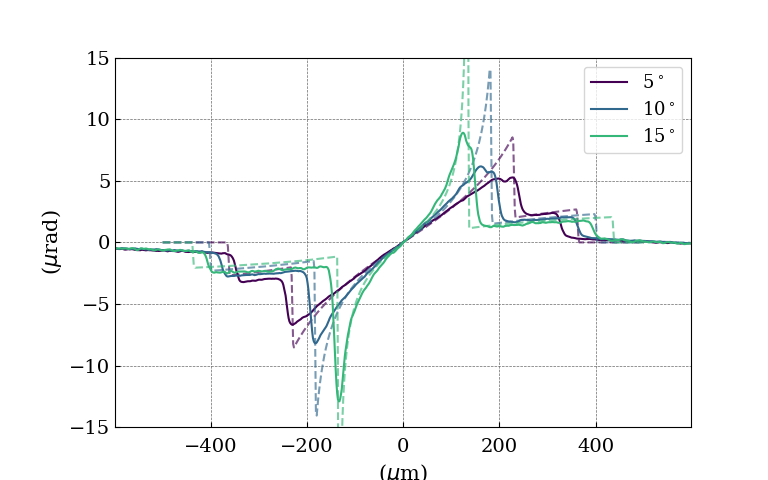

In [31]:
for i in range(len(scan)):
    image = b4pt.Image2Plot(vv_exp_bis[i, :]*1e6, y_exp[i, :]*1e6)
    image.LineStyle = '-'
    image.label = str(scan[i])+'$^\circ$'
    image.sort_class()
    image.alpha = 1
    image.LaTex = True
    image.LabelPos = 1
    image.ColorScheme = colors[i]
    if i == 0:
        b4pt.plot_1D(image, Enable=False, Hold=False)
        image = b4pt.Image2Plot(vv[i, :]*1e6, y*1e6)
        image.alpha = alpha
        image.ColorScheme = colors[i]
        image.LineStyle = '--'
        b4pt.plot_1D(image, Enable=False, Hold=True)        
    elif i == len(scan)-1:
        b4pt.plot_1D(image, Enable=False, Hold=True, dpi=dpi)
        image = b4pt.Image2Plot(vv[i, :]*1e6, y*1e6)
        image.alpha = alpha
        image.LineStyle = '--'
        image.AspectRatio = False
        image.LaTex = True
        image.legends = ['', '($\mu$m)', '($\mu$rad)']
        image.LabelPos = 1
        image.ax_limits = [-Av*1e6, Av*1e6, -15, 15]
        image.ColorScheme = colors[i]
        image.grid = True
        image.sort_class()
        b4pt.plot_1D(image, './results/1D_Be_R100um_ver_grad_cuts_comp_bis_orthogonal.png', Enable=True, Hold=True)
    else:
        image.ColorScheme = colors[i]
        b4pt.plot_1D(image, Enable=False, Hold=True)  
        image = b4pt.Image2Plot(vv[i, :]*1e6, y*1e6)
        image.alpha = alpha
        image.ColorScheme = colors[i]
        image.LineStyle = '--'
        b4pt.plot_1D(image, Enable=False, Hold=True)